In [1]:
import numpy as np

import sys
sys.path.append("src/")
import gp

import gpflow
import matplotlib.pyplot as plt

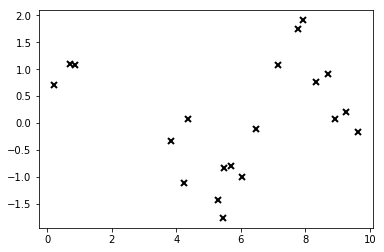

In [2]:
np.random.seed(0)
X = np.random.rand(20, 1)*10
Y = np.sin(X) + 0.9 * np.cos(X*1.6) + np.random.randn(*X.shape)* 0.4
Xtest = np.random.rand(10,1)*10
plt.plot(X, Y, 'kx', mew=2)

In [3]:
m1 = gp.GPRHet(X, Y, kern=gpflow.kernels.RBF(1))
opt = gpflow.train.ScipyOptimizer()
opt.minimize(m1)

/project/jnovembre/jhmarcus/src/miniconda3/envs/gp_env/lib/python3.6/site-packages/gpflow/densities.py:89: UserWarning: Shape of x must be 2D at computation.
  warnings.warn('Shape of x must be 2D at computation.')


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 7.554569
  Number of iterations: 62
  Number of functions evaluations: 70


In [ ]:
import tensorflow as tf

In [ ]:
tf.exp

In [5]:
m2 = gpflow.models.GPR(X, Y, kern=gpflow.kernels.RBF(1))
opt = gpflow.train.ScipyOptimizer()
opt.minimize(m2)

/project/jnovembre/jhmarcus/src/miniconda3/envs/gp_env/lib/python3.6/site-packages/gpflow/densities.py:89: UserWarning: Shape of x must be 2D at computation.
  warnings.warn('Shape of x must be 2D at computation.')


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.834361
  Number of iterations: 8
  Number of functions evaluations: 13


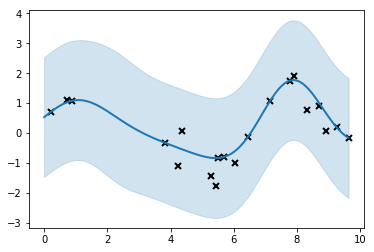

In [4]:
xx = np.linspace(0, np.max(X[:,0]), 100).reshape(100, 1)
mean, var = m1.predict_y(xx)
plt.plot(X, Y, 'kx', mew=2)
line, = plt.plot(xx, mean, lw=2)
_ = plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color=line.get_color(), alpha=0.2)

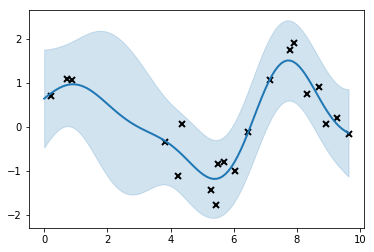

In [6]:
xx = np.linspace(0, np.max(X[:,0]), 100).reshape(100, 1)
mean, var = m2.predict_y(xx)
plt.plot(X, Y, 'kx', mew=2)
line, = plt.plot(xx, mean, lw=2)
_ = plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color=line.get_color(), alpha=0.2)

In [10]:
m1.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPRHet/kern/variance,Parameter,None,+ve,True,(),True,0.8750425014768585
GPRHet/kern/lengthscales,Parameter,None,+ve,True,(),True,1.274640707781616
GPRHet/likelihood/variance,Parameter,None,+ve,True,(),True,1.0
GPRHet/d,Parameter,None,(none),True,"(20,)",True,"[-28.207802986370172, -29.988707179441647, -1...."
